<a href="https://colab.research.google.com/github/brsanjay/ML-regressions-using-python/blob/main/simple-linear-regression/2-fuel-economy/2-fuel-economy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM STATEMENT

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power 
    - Dependant variable Y: Mileage Per Gallon (MPG) 

# STEP #1: LIBRARIES IMPORT

In [1]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #2: IMPORT DATASET

In [4]:
FuelEconomy = pd.read_csv('FuelEconomy.csv')
FuelEconomy

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
...,...,...
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593


In [5]:
FuelEconomy.head(5)

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [6]:
FuelEconomy.tail(5)

,Horse Power,Fuel Economy (MPG)
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593
99,184.123053,25.196097


In [7]:
FuelEconomy.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [8]:
FuelEconomy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


# STEP#3: VISUALIZE DATASET

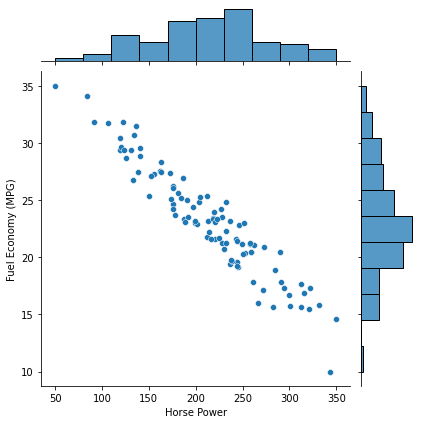

In [18]:
sns.jointplot(x='Horse Power', y='Fuel Economy (MPG)', data=FuelEconomy)

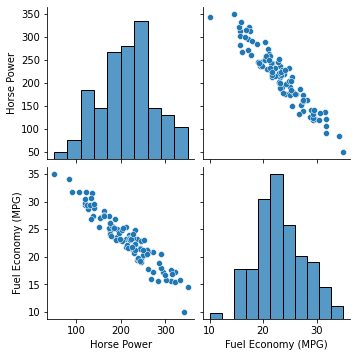

In [19]:
sns.pairplot(FuelEconomy)

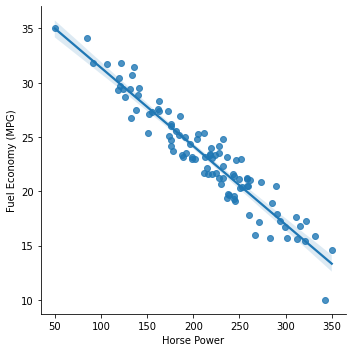

In [21]:
sns.lmplot(x='Horse Power', y='Fuel Economy (MPG)', data=FuelEconomy)

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [22]:
from sklearn.model_selection import train_test_split

In [29]:
X=FuelEconomy[['Horse Power']]
X

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
...,...
95,162.810542
96,266.869640
97,243.831211
98,140.959803


In [30]:
Y = FuelEconomy[['Fuel Economy (MPG)']]
Y

,Fuel Economy (MPG)
0,29.344195
1,24.695934
2,23.952010
3,23.384546
4,23.426739
...,...
95,27.418661
96,15.989945
97,19.253375
98,29.515593


In [31]:
X.shape

(100, 1)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [33]:
x_train.shape

(80, 1)

# STEP#5: TRAIN THE MODEL

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(x_train, y_train)

LinearRegression()

In [35]:
print('Linear Model Coefficient (m)', regressor.coef_)
print('Linear Model Coefficient (b)', regressor.intercept_)

Linear Model Coefficient (m) [[-0.0733005]]
Linear Model Coefficient (b) [38.87725908]


# STEP#6: TEST THE MODEL 

In [36]:
y_predict = regressor.predict(x_test)
y_predict

array([[21.85566531],
       [20.50014248],
       [22.51807886],
       [29.1525131 ],
       [22.18889979],
       [20.36504254],
       [29.93165405],
       [24.29351481],
       [15.28617054],
       [30.17129996],
       [29.79637526],
       [13.22208354],
       [19.68336809],
       [18.16222608],
       [21.45570273],
       [22.85418435],
       [23.15543817],
       [15.3513636 ],
       [27.48523469],
       [25.97789405]])

Text(0.5, 1.0, 'Fuel Economy (MPG) vs. Horse Power (Training Set)')

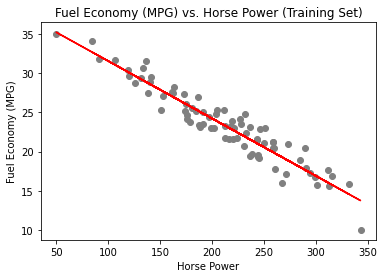

In [39]:
plt.scatter(x_train, y_train, color='gray')
plt.plot(x_train, regressor.predict(x_train), color='red')
plt.ylabel('Fuel Economy (MPG)')
plt.xlabel('Horse Power')
plt.title('Fuel Economy (MPG) vs. Horse Power (Training Set)')

Text(0.5, 1.0, 'Fuel Economy (MPG) vs. Horse Power (Testing Set)')

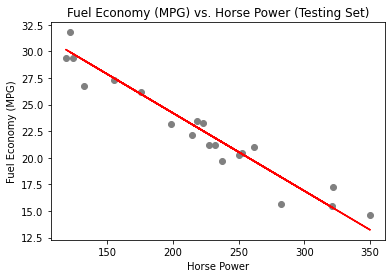

In [38]:
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, regressor.predict(x_test), color='red')
plt.ylabel('Fuel Economy (MPG)')
plt.xlabel('Horse Power')
plt.title('Fuel Economy (MPG) vs. Horse Power (Testing Set)')

In [41]:
# Fuel economy predictions
HP = np.array([[100]])
FE = regressor.predict(HP)
FE

c:\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[31.54720893]])